# Machine Learning baseline generator


In [1]:
# import scripts
from ds_utils import *
# import warnings
# warnings.filterwarnings("ignore")

In this notebook we will show the chosen procedure for the Machine Learning baseline generator.
The first step is to create a list of train and test datasets which will be used to generate and estimae a set of performances of more common used algorithms. In order to have a wide approximation several metrics will be used for every model.

### Step 1
So as a first step lets define a list o datasets.

In [2]:
# set list of train and test files
listFiles_tr = ['minitrain.csv', 's.ds_MA_tr.csv']
listFiles_ts = ['minitest.csv', 's.ds_MA_ts.csv']

Once defined our list of datasets, let's call baseline_generator function which will generate a dataframe with all performances for every combination of dataset and algorithm. Remenber we are using a set of algorithms as a baseline where are included basic, complex and ensemble methods. For more information you can call baseline_classifiers method fror the ds_utils.py script to see which algorithms and parameters are being used for the baseline. Another aspect to point out is that weights for algorithms that used this parameter are calculated using set_weights method based on the class_weight.compute_class_weight sklearn method. More information can be found at: https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [8]:
# calling baseline_classifiers to see which algorithms and parameters are being used. Remember that
# baseline_classifiers() need a y_tr_data argument to be executed, it can be any y_tr_data if you just want
# to see the output

y_tr_data = datasets_parser(listFiles_tr[0], listFiles_ts[0])[1]
ML_methods_used = baseline_classifiers(y_tr_data)
ML_methods_used

class weights [0.65337711 2.12996942]
Ratio 0/1 0.6533771106941839 : 2.1299694189602447
**************************************


[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
            weights='uniform'),
 LinearSVC(C=1.0, class_weight={0: 0.6533771106941839, 1: 2.1299694189602447},
      dual=True, fit_intercept=True, intercept_scaling=1,
      loss='squared_hinge', max_iter=5000, multi_class='ovr', penalty='l2',
      random_state=0, tol=0.0001, verbose=0),
 LogisticRegression(C=1.0,
           class_weight={0: 0.6533771106941839, 1: 2.1299694189602447},
           dual=False, fit_intercept=True, intercept_scaling=1,
           max_iter=500, multi_class='warn', n_jobs=None, penalty='l2',
           random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
           warm_start=False),
 SVC(C=1.0, cache_size=200,
   class_weight={0: 0.6533771106941839, 1: 2.1299694189602447}, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
   max_iter=-1, probability=True, random_state=0, shrinking=Tru

### Step 2
Once settle this. The next step is to call the baseline_generator method which takes as arguments a list of train and test sets we define previously. This function will calculate some metrics for each combination of train-test sets and will create a dataframe with all the performances. The final dataframe is sorted by AUC value, so the first row will correspond to the algorithm and dataset which achieve better perforamce

In [4]:
baseline = baseline_generator(listFiles_tr, listFiles_ts)
baseline

-> Generating Basic Machine Learning baseline...
class weights [0.65337711 2.12996942]
Ratio 0/1 0.6533771106941839 : 2.1299694189602447
**************************************


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


class weights [0.5521978  5.28947368]
Ratio 0/1 0.5521978021978022 : 5.2894736842105265
**************************************


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined

---> Saving results ...
! Please find your ML results in: ML_baseline_generator.csv
Done!


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,MLA_dataset,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA F1_score,MLA AUC,MLA Matthews Coefficient
9,minitrain.csv,GradientBoostingClassifier,0.9002,0.7696,[0.78571429 0.70833333],[0.91082803 0.46575342],0.561983,0.688291,0.431334
8,minitrain.csv,RandomForestClassifier,0.9928,0.7478,[0.79289941 0.62295082],[0.85350318 0.52054795],0.567164,0.687026,0.394397
4,minitrain.csv,AdaBoostClassifier,0.8457,0.7217,[0.79245283 0.56338028],[0.80254777 0.54794521],0.555556,0.675246,0.353153
10,minitrain.csv,BaggingClassifier,0.9770,0.7087,[0.78125 0.54285714],[0.79617834 0.52054795],0.531469,0.658363,0.320395
6,minitrain.csv,MLPClassifier,0.8205,0.7348,[0.76086957 0.63043478],[0.89171975 0.39726027],0.487395,0.644490,0.336272
0,minitrain.csv,KNeighborsClassifier,0.8478,0.6783,[0.76774194 0.49333333],[0.75796178 0.50684932],0.500000,0.632406,0.262937
3,minitrain.csv,SVC,0.7437,0.6522,[0.76190476 0.45783133],[0.7133758 0.52054795],0.487179,0.616962,0.226719
2,minitrain.csv,LogisticRegression,0.6662,0.4739,[0.89130435 0.36956522],[0.2611465 0.93150685],0.529183,0.596327,0.224182
1,minitrain.csv,LinearSVC,0.6655,0.4739,[0.86 0.36666667],[0.27388535 0.90410959],0.521739,0.588997,0.200862
5,s.ds_MA_tr.csv,GaussianNB,0.8557,0.7059,[0.91836735 0.15789474],[0.73770492 0.42857143],0.230769,0.583138,0.112608


According to the previous result it seems that the minitrain.csv dataset tend to get better performances that s.ds_MA.tr.csv. On the other hand Gradient Boosting Classifier is the method that achieves better performance, so is probably a good candidate for the minitrain.csv dataset. We could try some combination of parameters on that dataset and algorithm in the gridsearch strategy. But before we go any further we can plot the ROC curves for this baseline so that we can have a graphic comparaison across the methods used for the baseline.

### Step 3
Plot the roc curves for the baseline from above. We can do this by calling the ROC_baseline_plot which will use an unique pair of train a test datasets. Since we can conclude that the dataset with better performances is the minitrain.csv we can use it for this purpose.

class weights [0.65337711 2.12996942]
Ratio 0/1 0.6533771106941839 : 2.1299694189602447
**************************************


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


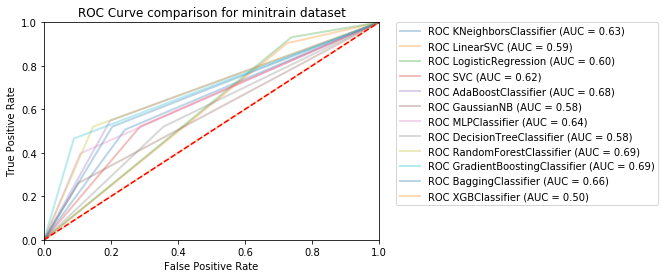

In [9]:
# train and test sets used for ROC_baseline_plot
newFile_tr = 'minitrain.csv' # new training data 
newFile_ts = 'minitest.csv' # new testing data
roc_curve_baseline = ROC_baseline_plot(newFile_tr, newFile_ts)

With the previous plot we can confirm once again that GradientBoostingClassifier is a good candidate to optimize for this dataset.

In another notebook we will analyze how to look for a good combination of parameters for a set of chosen algorithms.